In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

def plot_distribution_summary(data, title="Distribution Summary"):
    # Compute statistics
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data, fisher=True)
    ks_stat, _ = stats.kstest(data, 'norm', args=(mean, std))

    # Set up the plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    plt.suptitle(title.upper(), fontsize=14)

    # KDE plot
    sns.kdeplot(data, ax=axes[0], color='gray', fill=True)
    axes[0].set_title("Kernel Density")
    axes[0].grid(True, linestyle='--', alpha=0.3)
    axes[0].tick_params(labelsize=10)


    # QQ plot
    stats.probplot(data, dist="norm", sparams=(mean, std), plot=axes[1])
    axes[1].get_lines()[1].set_color("black")  # QQ reference line
    axes[1].get_lines()[0].set_markerfacecolor("gray")  # Sample points
    axes[1].get_lines()[0].set_markeredgecolor("gray")
    axes[1].set_title("QQ Plot (Normal)")
    axes[1].grid(True, linestyle='--', alpha=0.3)
    axes[1].tick_params(labelsize=10)
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontname("Courier New")

    # Text box with stats
    stats_text = (
        f"Mean: {mean:.2f}    SD: {std:.2f}    "
        f"Skew: {skew:.2f}    Kurtosis: {kurt:.2f}    "
        f"KS Stat: {ks_stat:.3f}"
    )
    fig.text(0.5, 0.02, stats_text, ha='center', fontsize=11)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

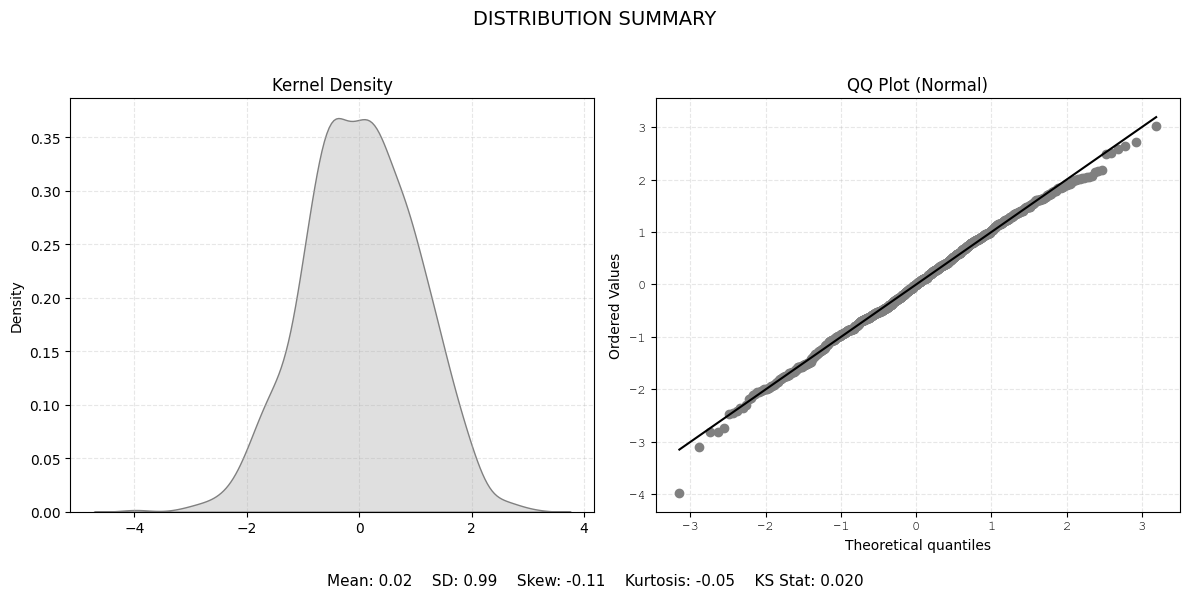

In [8]:
import numpy as np
sample_data = np.random.normal(0, 1, size=1000)
plot_distribution_summary(sample_data)


In [24]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
from datetime import datetime
import pandas as pd
def plot_annotated_returns(df: pl.DataFrame, date_col: str = "Month", return_col: str = "Return"):
    # Convert date strings to datetime


    # Compute basic stats
    returns = df[return_col].to_numpy()
    dates = df[date_col].to_numpy()
    mean = returns.mean()
    std = returns.std()

    # Set up plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(dates, returns, marker='o', linestyle='-', color='gray', label="Monthly Return")

    # Add horizontal lines for mean and ±1, ±2 std
    for i in [-2, -1, 1, 2]:
        ax.axhline(mean + i * std, color='black', linestyle='--', alpha=0.2)

    # Annotate events with large drops
    for date, ret in zip(dates, returns):
        if ret < mean - 1.5 * std:
            label = f"{pd.to_datetime(str(date)).strftime('%b %Y')}\n{ret:.2%} ({(ret - mean)/std:.1f}σ)"

            ax.annotate(label,
                        xy=(date, ret),
                        xytext=(date, ret - 0.05),
                        textcoords='data',
                        ha='center',
                        fontsize=9,
                        fontname='Courier New',
                        arrowprops=dict(arrowstyle='->', color='black', lw=0.8))

    ax.set_title("Time Series of Monthly Returns", fontname='Courier New')
    ax.set_ylabel("Return", fontname='Courier New')
    ax.set_xlabel("Date", fontname='Courier New')
    ax.grid(True, linestyle='--', alpha=0.3)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontname("Courier New")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
